# Problem 9 - Scrabble Word Length Bias
----
In a previous assignment you created a Scrabble word generator that takes a rack of letters and shows all the possible words that can be created. What is the efficiency, in big-O notation, of your solution?


In [ ]:
"O(n × n!) because of itertools.permutations"

Write a program that randomly selects 7 letters and computes the time it takes to compute all the valid words for each possible word length. Run your program 10 times and plot out the results for each random set of letters.

The plots should look similar to the following:

![](images/plot_9.png)

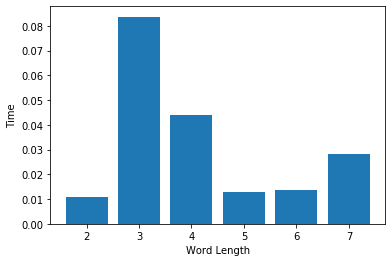

In [ ]:
import random
import string
import scrabble
import matplotlib.pyplot as plt
import time

SCRABBLE_WORDS_FILE = "scrabble_list.txt"

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for trial in range(10):
    rack_letters = random.choices(string.ascii_lowercase, k=7)
    
    runtimes = []
    word_lengths = []
    
    for length in range(2, 8):
        subset_letters = rack_letters[:length]
        start = time.time()
        scrabble_words = scrabble.ScrabbleWordValidator(SCRABBLE_WORDS_FILE, subset_letters)
        end = time.time()
        runtimes.append(end - start)
        word_lengths.append(length)
    
    axes[trial].bar(word_lengths, runtimes)
    axes[trial].set_xlabel("Word Length")
    axes[trial].set_ylabel("Time (seconds)")
    axes[trial].set_title(f"Trial {trial + 1}: {''.join(rack_letters)}")

plt.tight_layout()
plt.show()

Do the specific letters that are in your rack affect the efficiency of your solution? Do they impact the actual runtime? How can can you design an experiment to verify this? Run your experiment and provide evidence to support your claim.

In [ ]:
import random
import string
import scrabble
import matplotlib.pyplot as plt
import time

SCRABBLE_WORDS_FILE = "scrabble_list.txt"

common_letters = ['e', 'a', 'r', 'i', 'o', 't', 's']
uncommon_letters = ['q', 'x', 'z', 'j', 'k', 'w', 'v']
random_letters = random.choices(string.ascii_lowercase, k=7)

test_cases = [
    ("Common Letters (e,a,r,i,o,t,s)", common_letters),
    ("Uncommon Letters (q,x,z,j,k,w,v)", uncommon_letters),
    ("Random Letters", random_letters)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (label, rack_letters) in enumerate(test_cases):
    runtimes = []
    word_lengths = []

    for length in range(2, 8):
        subset_letters = rack_letters[:length]
        start = time.time()
        scrabble_words = scrabble.ScrabbleWordValidator(SCRABBLE_WORDS_FILE, subset_letters)
        end = time.time()
        runtimes.append(end - start)
        word_lengths.append(length)
    
    axes[idx].bar(word_lengths, runtimes)
    axes[idx].set_xlabel("Word Length")
    axes[idx].set_ylabel("Time (seconds)")
    axes[idx].set_title(label)

plt.tight_layout()
plt.show()


print("""
Yes, the letters matter for actual runtime, but not for Big-O complexity. 
The complexity stays O(n x n!) regardless of which letters you use.

The reason runtime changes: common letters like E, A, R form more valid words 
than rare letters like Q, X, Z. So fewer permutations actually match the dictionary.

However, word length is the main factor. Going from 2-letter to 7-letter words 
causes exponential growth in permutations—much more significant than swapping letters.
""")
